Library imports

In [1]:
import pandas as pd 
import numpy as np 
# Models 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# StandardScaler and MixMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Graphic 
import matplotlib.pyplot as plt 
import seaborn as sns




In [2]:
aero_df = pd.read_csv(r'C:\Users\Rícharde\Documents\Dell lead\Atividade 04\aerogerador2.csv')

In [3]:
aero_df.head()

,Wind Speed (m/s),TheoreticalPowerCurve
0,2.9,16.0
1,2.9,16.0
2,2.9,16.0
3,3.0,18.0
4,3.0,18.0


Separação dos dados

In [4]:
X = aero_df['Wind Speed (m/s)'].values
y = aero_df['TheoreticalPowerCurve'].values

In [5]:
X = np.array(X)


# Estime a curva de potência utilizando regressão linear e regressão polinomial. Calcule métricas adequadas para o problema e justifique suas escolhas.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [7]:
lr = LinearRegression(fit_intercept=True, n_jobs=-1)
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression(n_jobs=-1)

In [8]:
y_pred_lr = lr.predict(X_test.reshape(-1,1))
y_pred_lr = np.array(y_pred_lr)

Mae Result

In [9]:
mae_pred_lr = mean_absolute_error(y_test,y_pred_lr)
print(mae_pred_lr)

15.426794849032165


MSE Result

In [10]:
mse_pred_lr = mean_squared_error(y_test,y_pred_lr)
print(mse_pred_lr)

517.7416457424604


Regressão Linear polinomal

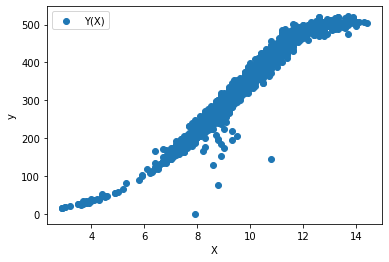

In [11]:
plt.scatter(X,y,label='Y(X)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [12]:
features_2 = PolynomialFeatures(degree=2)
X = X.reshape(-1,1)
X_Poly_2 = features_2.fit_transform(X)

In [13]:
lr = LinearRegression(fit_intercept=True, n_jobs=-1)
y_train = np.array(y_train)


In [14]:
lr.fit(X_Poly_2,y.reshape(-1,1))

LinearRegression(n_jobs=-1)

In [15]:
poly_lr_predict = lr.predict(X_Poly_2)

Mae Result

In [16]:
mae_pred_lr_poly = mean_absolute_error(y,poly_lr_predict)
print(mae_pred_lr_poly)

15.579246293865294


MSE Result

In [17]:
mse_pred_lr_poly = mean_squared_error(y,poly_lr_predict)
print(mse_pred_lr)

517.7416457424604


Para avaliação foi utilizada as métricas Mean Absolute Error (MAE) e Mean Squared Error (MSE). MAE foi utilizado por conta que com essa métrica temos a diferença entre o valor observado e o valor estimado pelo modelo realizando uma média dos erros absolutos do modelo. É uma forma simples de avalição e retorna uma ideia do desempenho geral do modelo. Como o problema em questão envolve o tratamentno de outliers, utilizei o MSE. Sendo o MSE semelhante ao MAE, porém temos a média da soma dos quadrados dos erros o que ajuda a punir os grandes erros por estarem elevados ao quadrado



# Remova os outliers

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TheoreticalPowerCurve'>

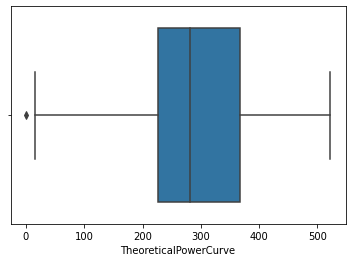

In [18]:
# Box plot 
sns.boxplot(aero_df['TheoreticalPowerCurve'])

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind Speed (m/s)'>

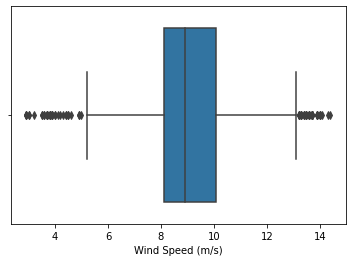

In [19]:
sns.boxplot(aero_df['Wind Speed (m/s)'])

Text(0.5, 0, '(Wind speed)')

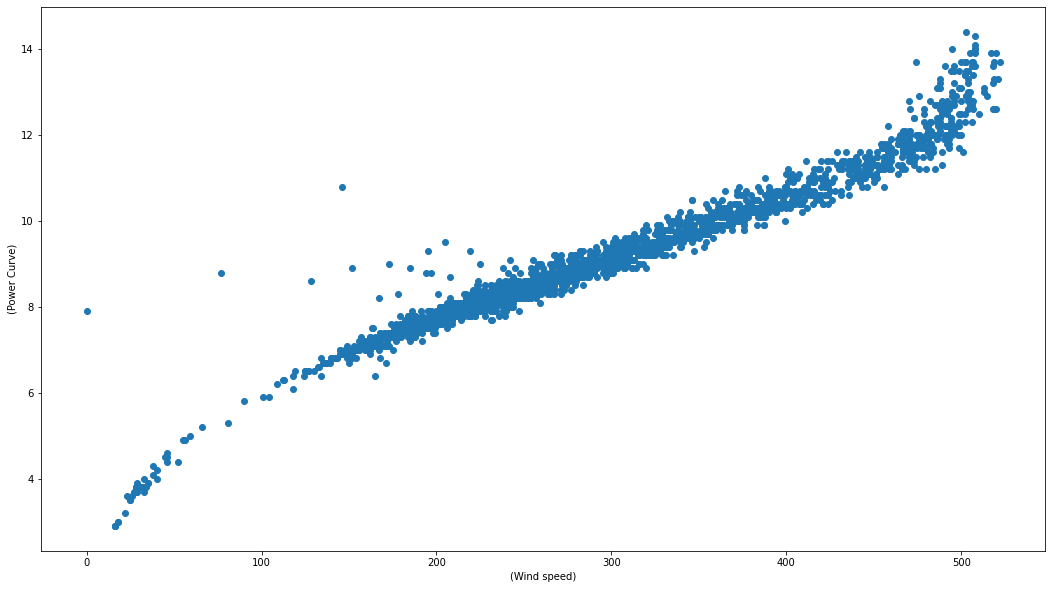

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(aero_df['TheoreticalPowerCurve'],aero_df['Wind Speed (m/s)'])

# x label
ax.set_ylabel('(Power Curve)')
ax.set_xlabel('(Wind speed)')

Removendo os Outiliers

In [21]:
def deleteOutliers(pred_Out, data):
    for index in data.index:
        if pred_Out[index] == -1:
            data = data.drop(index)
    return data        

In [22]:
outlier_model = LocalOutlierFactor(n_neighbors=8,algorithm='auto',leaf_size=15,metric='euclidean',p=2)
pred_outlier  = outlier_model.fit_predict(aero_df)

In [23]:
aero_df = deleteOutliers(pred_outlier,aero_df)

<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='TheoreticalPowerCurve'>

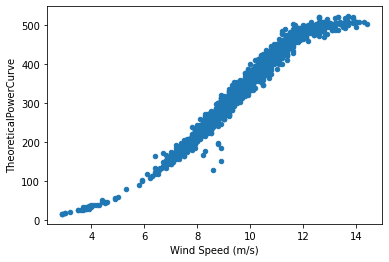

In [24]:
aero_df.plot.scatter('Wind Speed (m/s)','TheoreticalPowerCurve')

# Estime a curva de potência sem os outliers. Calcule as métricas utilizadas na etapa 2.

In [25]:
X = aero_df['Wind Speed (m/s)'].values
y = aero_df['TheoreticalPowerCurve'].values


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [27]:
features_2 = PolynomialFeatures(degree=2)
X_train = X_train.reshape(-1,1)
X_Train_Poly_2 = features_2.fit_transform(X_train)

In [28]:
lr = LinearRegression(fit_intercept=True, n_jobs=-1)
y_train = np.array(y_train)


In [29]:
lr.fit(X_Train_Poly_2, y_train.reshape(-1,1))

LinearRegression(n_jobs=-1)

In [30]:
X_test = np.array(X_test)
X_test_poly = features_2.fit_transform(X_test.reshape(-1,1))

In [31]:
y_pred_poly = lr.predict(X_test_poly)

MAE Result 

In [32]:
mae_pred_lr_poly = mean_absolute_error(y_test,y_pred_poly)
print(mae_pred_lr_poly)

15.248375293449685


MSE Result

In [33]:
mse_pred_lr_poly = mean_squared_error(y_test,y_pred_poly)
print(mse_pred_lr)

517.7416457424604


# Realize diferente experimentos, modificando o grau do polinômio. Escolha uma ou mais métricas e realize o plot grau do polinômio vs métrica

In [34]:
def PolyDegree(list_degree,X_train,y_train,X_test):
    Degree_predict = {}
    for degree_value in list_degree:
        n_degree = PolynomialFeatures(degree=degree_value,interaction_only=False)
        X_train = X_train.reshape(-1,1)
        X_test  = X_test.reshape(-1,1)
        X_train_poly  = n_degree.fit_transform(X_train.reshape(-1,1))
        X_test_poly   = n_degree.fit_transform(X_test.reshape(-1,1))
        linear = LinearRegression(fit_intercept=True, n_jobs=-1)
        linear.fit(X_train_poly,y_train)
        Degree_predict[degree_value] = linear.predict(X_test_poly)
    return Degree_predict

In [35]:
results_Several_Poly = PolyDegree(range(2,20), X_train,y_train,X_test)

In [36]:
MAE_Result = []
MSE_Result = []
for pred in results_Several_Poly.keys():
    MAE_Result.append(mean_absolute_error(y_test,results_Several_Poly.get(pred)))
    MSE_Result.append(mean_squared_error(y_test,results_Several_Poly.get(pred)))
    

Grau do polinômio VS Métrica

MAE vs Grau do polinômio

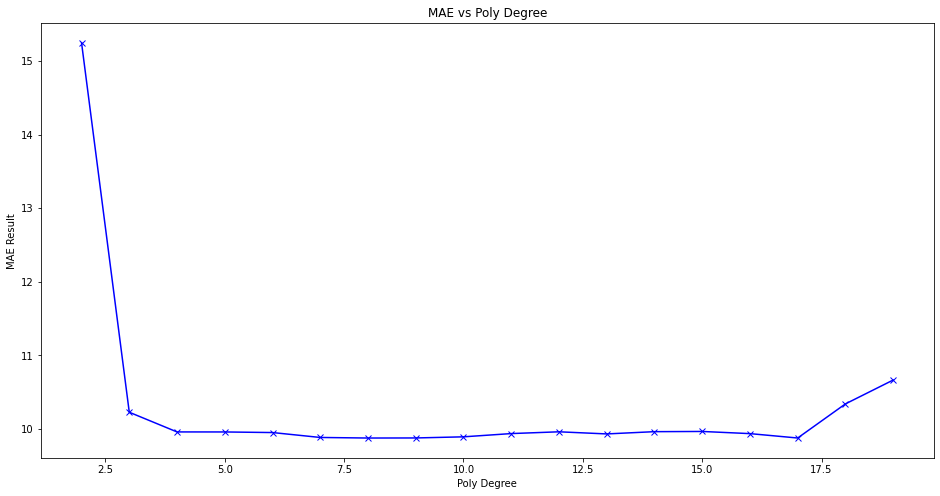

In [37]:
plt.figure(figsize=(16,8))
plt.plot(range(2,20), MAE_Result,'bx-')
plt.xlabel('Poly Degree')
plt.ylabel('MAE Result')
plt.title('MAE vs Poly Degree')
plt.show()

MSE vs Grau do polinômio

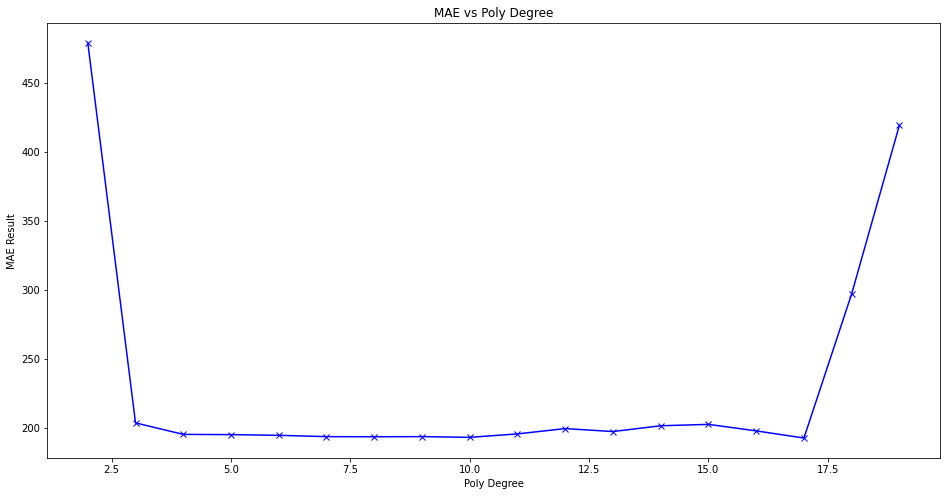

In [38]:
plt.figure(figsize=(16,8))
plt.plot(range(2,20), MSE_Result,'bx-')
plt.xlabel('Poly Degree')
plt.ylabel('MAE Result')
plt.title('MAE vs Poly Degree')
plt.show()

# Discuta os resultados.


Analisando todo o trabalho acima, podemos ver que o modelo tende a prever de forma mais acertiva quando temos um polinômio de grau 2. Polinômios de graus mais avançados tendem a piorar drasticamente o modelo. Apenas quando temos um polinômio de grau acima de 16 temos alguma melhora, porém é uma melhora modesta e ainda bem abaixo do desempenho do polinômio de grau 2. 

# Utilize o dataset Boston House Prices.


In [39]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

Análise exploratória dos dados 

In [40]:
housing = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
housing['MEDV'] = boston_dataset.target
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [41]:
housing.shape

(506, 14)

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [43]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

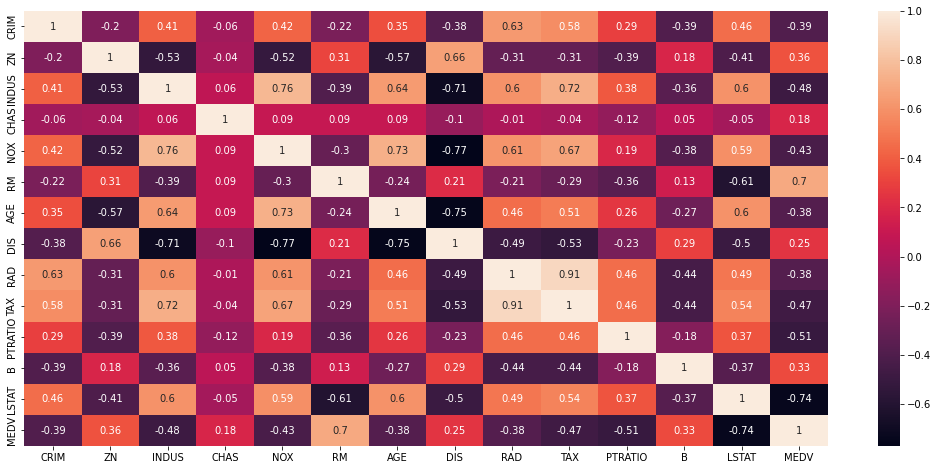

In [44]:
# Matriz de correlações 
matrix = housing.corr().round(2)
plt.figure(figsize=(18,8))
sns.heatmap(data=matrix,annot=True)
plt.show()

Alta correlação entre a quantidade média de número dos quartos com o preço dos imóveis

LSAT (Status mais baixo da população) tem alta correlação negativa com o preço dos imóveis 

Separação dos dados

In [45]:
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [46]:
X.shape

(506, 13)

In [47]:
tsne_reduce = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=20000)
tsne_result = tsne_reduce.fit_transform(X)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.001s...
[t-SNE] Computed neighbors for 506 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 10.114709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.608517
[t-SNE] KL divergence after 5200 iterations: 0.276534


> Data Visualization with TSNE

Olha depois
df['tsne-2d-one'] = tsne_result[:,0]
df['tsne-2d-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=boston_dataset.target,
    palette=sns.color_palette("hls",13),
    data= df, 
    legend="full",
    alpha=0.3
)

# Realize a predição do valor monetário de uma casa localizada na área de Boston utilizando diversas técnicas de regressão (Linear, Random Forest, SVM, entre outros). Calcule métricas adequadas para o problema e justifique suas escolhas.

Inicializando algoritmos

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [49]:
models = {}
models['DT']  = DecisionTreeRegressor(random_state=42)
models['Knn'] = KNeighborsRegressor()
models['RF']  = RandomForestRegressor(random_state=42)
models['Ada'] = AdaBoostRegressor(random_state=42)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [51]:
def train_Test_Model():
    result = {}
    for model in models:
        alg =models[model]
        alg.fit(X_train,y_train)
        result[str(model)] = alg.predict(X_test)
    return result    

In [52]:
final_result = train_Test_Model()
MAE_Result   =  {}
MSE_Result   =  {}
for result in final_result:
    MAE_Result[str(result)] = mean_absolute_error(y_test,final_result[result])
    MSE_Result[str(result)] = mean_squared_error(y_test,final_result[result])

MAE Results 

In [53]:
MAE_Result

{'DT': 3.4866666666666664,
 'Knn': 6.167111111111112,
 'RF': 3.074261728395064,
 'Ada': 3.1306930669060846}

MSE Result

In [54]:
MSE_Result

{'DT': 27.01859259259259,
 'Knn': 75.16864790123456,
 'RF': 21.382902706172867,
 'Ada': 21.719659908055192}

# Analisando com diversos hiperparâmetros 

In [55]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__splitter'] = ['best','random']
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__criterion'] = ['squared_error','absolute_error','poisson', 'friedman_mse']
param1['classifier'] = [models['DT']]

param2 = {}
param2['classifier__n_estimators'] = [5,10,20,30,40,50,80,100,150]
param2['classifier__max_leaf_nodes'] = [5,10,15,20,25,30,35,40,50]
param2['classifier'] = [models['RF']]

param3 = {}
param3['classifier__n_neighbors'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__algorithm'] = ['ball_tree', 'kd_tree', 'brute']
param3['classifier__leaf_size'] = [5,10,15,25,30,50,60,100]
param3['classifier'] = [models['Knn']]

param4 = {}
param4['classifier__n_estimators'] = [10,20,30,40,50,60,70,80,100,500]
param4['classifier__learning_rate'] = [1,0.01,0.001,0.00001,0.00000001]
param4['classifier__loss'] = ['linear','square','exponential']
param4['classifier'] = [models['Ada']]


In [56]:
pipeline = Pipeline([('classifier', models['DT'])])
params = [param1, param2, param3, param4]

In [57]:
K_fold = KFold(n_splits=10,shuffle=True,random_state=42)

In [58]:
%%time
gs = GridSearchCV(pipeline, params, cv=K_fold, n_jobs=-1, scoring='neg_mean_absolute_error', return_train_score=True).fit(X_train, y_train)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Rícharde\AppData\Local\Programs\Python\

CPU times: total: 30.2 s
Wall time: 2min 28s


In [59]:
gs.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestRegressor(max_leaf_nodes=40, n_estimators=150,
                                       random_state=42))])

In [60]:
gs.best_score_

-3.0394250002842265

In [61]:
df_result = pd.DataFrame(gs.cv_results_)
df_result.shape

(375, 41)

In [62]:
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__max_depth,param_classifier__splitter,param_classifier__max_leaf_nodes,param_classifier__n_estimators,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005086,0.001753,0.002993,0.000772,DecisionTreeRegressor(random_state=42),squared_error,5,best,NaN,NaN,...,-0.965076,-1.119614,-1.080874,-1.086290,-1.140063,-1.156393,-0.872812,-1.054913,-1.073963,0.085789
1,0.004088,0.001133,0.002693,0.001184,DecisionTreeRegressor(random_state=42),squared_error,5,random,NaN,NaN,...,-2.511185,-1.965713,-2.109267,-1.669634,-2.184262,-1.970605,-1.671794,-2.250654,-2.012639,0.257942
2,0.004687,0.001002,0.002793,0.000977,DecisionTreeRegressor(random_state=42),squared_error,10,best,NaN,NaN,...,-0.172907,-0.193651,-0.209916,-0.072684,-0.149451,-0.212088,-0.077656,-0.155110,-0.161841,0.048658
3,0.005884,0.003168,0.002793,0.000977,DecisionTreeRegressor(random_state=42),squared_error,10,random,NaN,NaN,...,-0.385240,-0.357418,-0.272381,-0.336075,-0.228571,-0.043590,-0.010989,-0.184066,-0.229065,0.118271
4,0.006482,0.004331,0.002295,0.000456,DecisionTreeRegressor(random_state=42),squared_error,20,best,NaN,NaN,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.137633,0.012536,0.009973,0.003540,"(DecisionTreeRegressor(max_depth=3, random_sta...",NaN,NaN,NaN,NaN,60,...,-1.757407,-1.657162,-1.781809,-1.556460,-1.637838,-1.967315,-1.514780,-1.579710,-1.693106,0.136117
371,0.151894,0.008752,0.009275,0.000639,"(DecisionTreeRegressor(max_depth=3, random_sta...",NaN,NaN,NaN,NaN,70,...,-1.744524,-1.657826,-1.743997,-1.542497,-1.656785,-1.695081,-1.480888,-1.586412,-1.660379,0.105394
372,0.176229,0.009367,0.011569,0.002326,"(DecisionTreeRegressor(max_depth=3, random_sta...",NaN,NaN,NaN,NaN,80,...,-1.422295,-1.636606,-1.746887,-1.547414,-1.622538,-1.680540,-1.480331,-1.609904,-1.597314,0.091038
373,0.236667,0.017611,0.016656,0.006355,"(DecisionTreeRegressor(max_depth=3, random_sta...",NaN,NaN,NaN,NaN,100,...,-1.412203,-1.605660,-1.718960,-1.516314,-1.648350,-1.676441,-1.465048,-1.615217,-1.590165,0.092760


# Realizando normalização e padronização dos dados, utilizando o melhor classificador 

In [63]:
scaler = StandardScaler()
MinMax = MinMaxScaler()

In [78]:
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

In [79]:
X = np.array(X)
y = np.array(y)

StandardScaler

In [82]:
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [89]:
RF = RandomForestRegressor(max_leaf_nodes=40, n_estimators=150, random_state=42)
RF.fit(X_train,y_train)

C:\Users\Rícharde\AppData\Local\Temp\ipykernel_15196\984026646.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestRegressor(max_leaf_nodes=40, n_estimators=150, random_state=42)

MAE Result with standardization

In [92]:
y_pred = RF.predict(X_test)
MAE_STD = mean_absolute_error(y_test,y_pred)
print(MAE_STD)

0.3303321133301995


MSE Result with standardization

In [95]:
MSE_STD = mean_squared_error(y_test,y_pred)
print(MSE_STD)

0.24649357417279896


MinMaxScaler

In [98]:
X = MinMax.fit_transform(X)
y = MinMax.fit_transform(y.reshape(-1,1))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [100]:
RF = RandomForestRegressor(max_leaf_nodes=40, n_estimators=150, random_state=42)
RF.fit(X_train,y_train)

C:\Users\Rícharde\AppData\Local\Temp\ipykernel_15196\984026646.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestRegressor(max_leaf_nodes=40, n_estimators=150, random_state=42)

MAE Result with normalization 

In [103]:
y_pred = RF.predict(X_test)
MAE_STD = mean_absolute_error(y_test,y_pred)
print(MAE_STD)

0.0660982653835103


MSE Result with normalization 

In [106]:
MSE_STD = mean_squared_error(y_test,y_pred)
print(MSE_STD)

0.00982496277887283


Podemos analisar que o modelo obteve uma melhora considerável quando efetuamos a normalização dos dados. Com a padronização dos dados também obtivemos uma melhora quando comparado ao modelo sem a padronização, porém não foi um resultado maior do que o gerado pela normalização.